<a href="https://colab.research.google.com/github/PrachiSinghal86/Introduction-to-Pytorch/blob/master/MNIST_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from torch import nn
import torch.nn.functional as F
import torch
import helper
import matplotlib.pyplot as ply
from torchvision import datasets,transforms
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])
trainset=datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
images, labels = next(iter(trainloader))  

0it [00:00, ?it/s]

9920512it [00:01, 9642298.74it/s]                            


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 141278.33it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


1654784it [00:00, 2228411.10it/s]                            
0it [00:00, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


8192it [00:00, 53422.15it/s]            


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


In [3]:
model =nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),nn.Linear(128,64),
                     nn.ReLU(),nn.Linear(64,10))
crite=nn.CrossEntropyLoss()    #Loss Function

images=images.view(images.shape[0],-1)   #flatten the images
logits=model(images)
loss=crite(logits,labels)
print(loss)

tensor(2.2997, grad_fn=<NllLossBackward>)


In [4]:
model =nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),nn.Linear(128,64),
                     nn.ReLU(),nn.Linear(64,32),
                     nn.ReLU(),nn.Linear(32,10),nn.LogSoftmax(dim=1))
crite=nn.NLLLoss()    #Loss Function
logits=model(images)
loss=crite(logits,labels)
print(loss)

tensor(2.3021, grad_fn=<NllLossBackward>)


In [5]:
print("Before backward pss")
print(model[0].weight.grad)
loss.backward()
print("After Backward pss")
print(model[0].weight.grad)

Before backward pss
None
After Backward pss
tensor([[-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        ...,
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009]])


In [6]:
from torch import optim
optimizer=optim.SGD(model.parameters(),lr=0.01)
print('Initial Weights',model[0].weight)
images,labels= next(iter(trainloader))
images.resize_(64,784)

optimizer.zero_grad()
output=model.forward(images)
loss=crite(output,labels)
loss.backward()
print('Gradient:',model[0].weight.grad)

Initial Weights Parameter containing:
tensor([[-0.0057, -0.0174,  0.0130,  ..., -0.0133,  0.0294, -0.0169],
        [-0.0230,  0.0102, -0.0253,  ..., -0.0045,  0.0191, -0.0171],
        [-0.0223, -0.0313,  0.0277,  ...,  0.0173,  0.0142,  0.0277],
        ...,
        [ 0.0115,  0.0177,  0.0247,  ..., -0.0243, -0.0245,  0.0104],
        [ 0.0143,  0.0271, -0.0284,  ..., -0.0190,  0.0112,  0.0102],
        [-0.0223,  0.0149,  0.0013,  ..., -0.0330, -0.0245,  0.0199]],
       requires_grad=True)
Gradient: tensor([[-2.9613e-05, -2.9613e-05, -2.9613e-05,  ..., -2.9613e-05,
         -2.9613e-05, -2.9613e-05],
        [ 8.1768e-04,  8.1768e-04,  8.1768e-04,  ...,  8.1768e-04,
          8.1768e-04,  8.1768e-04],
        [ 1.0990e-04,  1.0990e-04,  1.0990e-04,  ...,  1.0990e-04,
          1.0990e-04,  1.0990e-04],
        ...,
        [-5.3071e-05, -5.3071e-05, -5.3071e-05,  ..., -5.3071e-05,
         -5.3071e-05, -5.3071e-05],
        [-2.1523e-04, -2.1523e-04, -2.1523e-04,  ..., -2.1523e-04,

In [7]:
optimizer.step()
print('Updated weights',model[0].weight)

Updated weights Parameter containing:
tensor([[-0.0057, -0.0174,  0.0130,  ..., -0.0133,  0.0294, -0.0169],
        [-0.0231,  0.0102, -0.0253,  ..., -0.0045,  0.0191, -0.0171],
        [-0.0223, -0.0313,  0.0277,  ...,  0.0173,  0.0142,  0.0277],
        ...,
        [ 0.0115,  0.0177,  0.0247,  ..., -0.0243, -0.0245,  0.0104],
        [ 0.0143,  0.0271, -0.0284,  ..., -0.0190,  0.0112,  0.0102],
        [-0.0223,  0.0149,  0.0013,  ..., -0.0329, -0.0245,  0.0199]],
       requires_grad=True)


In [8]:
model =nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),nn.Linear(128,64),
                     nn.ReLU(),nn.Linear(64,32),
                     nn.ReLU(),nn.Linear(32,10),nn.LogSoftmax(dim=1))
crite=nn.NLLLoss()    #Loss Function
epoch=6
optimizer=optim.SGD(model.parameters(),lr=0.02)
for i in range(epoch):
  runlos=0
  for images,labels in trainloader:
    images=images.view(images.shape[0],-1)   #flatten the images
    optimizer.zero_grad()
    output=model.forward(images)
    loss=crite(output,labels)
    loss.backward()
    optimizer.step()
    runlos+=loss.item()
  else:
    print(f"Training Loss:{runlos/len(trainloader)}")



Training Loss:1.0148773129020672
Training Loss:0.35091109763679984
Training Loss:0.2727369791599733
Training Loss:0.21939045402493432
Training Loss:0.18083579468129796
Training Loss:0.15306886183872406


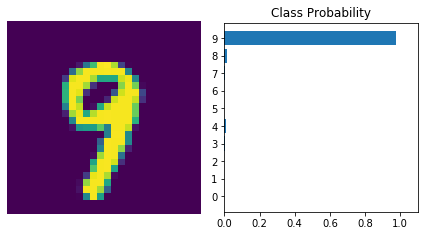

In [14]:
%matplotlib inline

import helper
images,labels=next(iter(trainloader))
img=images[3].view(1,784)
with torch.no_grad():
  logits=model.forward(img)
p=F.softmax(logits,dim=1)
view_classify(img.view(1,28,28),p)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()